The reference Collab Guide: https://colab.research.google.com/drive/1n5yCFsn9a76rNDx6dnwgdFLLoUIZATSS#scrollTo=8TRAh8G6sNfA

The reference repositories: 
Original: https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/stable_diffusion.ipynb#scrollTo=Ylscg48YYxfF

My copy: https://github.com/huggingface/diffusers/tree/main#new--stable-diffusion-is-now-fully-compatible-with-diffusers

The image editing library: https://pillow.readthedocs.io/en/stable/index.html

In [22]:
!nvidia-smi

Sun Dec  4 17:15:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    31W /  70W |  11780MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
!pip install diffusers==0.9.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 191 kB 28.5 MB/s 


In [24]:
from google.colab import output
output.enable_custom_widget_manager()

In [25]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


In [26]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to("cuda")

#prompt = "a photo of an astronaut riding a horse on mars"
#image = pipe(prompt).images[0]  
    
#image.save("astronaut_rides_horse.png")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [27]:
from PIL import Image
from torch import autocast
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [ ]:
num_cols = 2
num_rows = 2

prompt = ["an image of a person enjoying a refreshing drink from a durable, high-quality water bottle. The bottle should be prominently featured, with a clear and attractive design. The background should be a vibrant outdoor setting, and the image should be in 4k resolution for optimal printing and display."] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

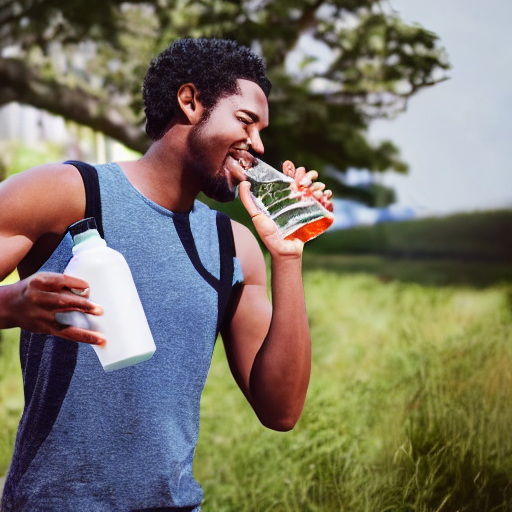

In [29]:
#Print one of the 4 images seperately
with grid as im:

    # The crop method from the Image module takes four coordinates as input.
    # The right can also be represented as (left+width)
    # and lower can be represented as (upper+height).
    (left1, upper1, right1, lower1) = (0, 0, 512, 512)
    (left2, upper2, right2, lower2) = (512,0,1024,512)
    (left3, upper3, right3, lower3) = (0,512,512,1024)
    (left4, upper4, right4, lower4) = (512,512,1024,1024)

im_first = im.crop((left1, upper1, right1, lower1))
im_second = im.crop((left2, upper2, right2, lower2))
im_third = im.crop((left3, upper3, right3, lower3))
im_fourth = im.crop((left4, upper4, right4, lower4))

#print = im_first
#print = im_second
#print = im_third
print = im_fourth
print

In [30]:
!pip install --upgrade diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/diffusers/utils/deprecation_utils.py:35: FutureWarning: The configuration file of this scheduler: PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.9.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 0,
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  warnings.warn(warning + message, FutureWarning)


  0%|          | 0/38 [00:00<?, ?it/s]

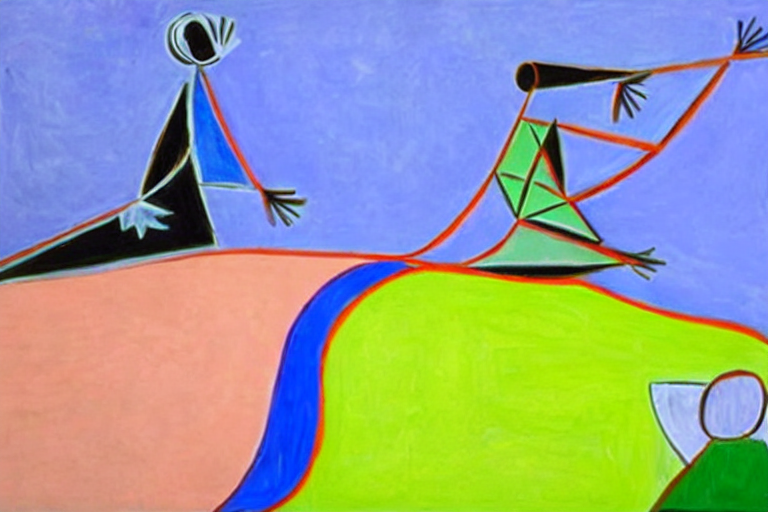

In [31]:
#Image with diffuser

import requests

from io import BytesIO
from diffusers import StableDiffusionImg2ImgPipeline

# load the pipeline
device = "cuda"
model_id_or_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
# or download via git clone https://huggingface.co/CompVis/stable-diffusion-v1-4
# and pass `model_id_or_path="./stable-diffusion-v1-4"` without having to use `use_auth_token=True`.
pipe = pipe.to(device)

# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

prompt = "picasso style"

with autocast("cuda"):
    images = pipe(prompt=prompt, init_image=init_image, strength=0.75, guidance_scale=7.5).images

#images[0].save("fantasy_landscape.png")
images[0]